In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

import corner

In [2]:
# Load the datasets

data = np.loadtxt('../dat/X.dat')#fetch_olivetti_faces()
targets = np.loadtxt('../dat/Y.dat')#data.target

halfsies = len(data)/2

data = data.reshape((len(data), -1))
# train = data[targets < 30]
# test = data[targets >= 30]  # Test on independent people

In [3]:
print(np.shape(data),np.shape(targets))
print(targets[0])

((41531, 5), (41531, 3))
[  4.05095994e-01   1.04152756e+12   2.21370406e-08]


In [32]:
# Test on a subset of people
n_gals = 1000
rng = check_random_state(4)
gal_ids = rng.randint(halfsies, size=(n_gals, ))
# test = test[face_ids, :]

n_pixels = data.shape[1]
X_train = np.loadtxt('../dat/X_train.dat')#train[:, :np.ceil(0.5 * n_pixels)]  # Upper half of the faces
y_train = np.loadtxt('../dat/Y_train.dat')#train[:, np.floor(0.5 * n_pixels):]  # Lower half of the faces
X_test = np.loadtxt('../dat/X_test.dat')#test[:, :np.ceil(0.5 * n_pixels)]
y_test = np.loadtxt('../dat/Y_test.dat')#test[:, np.floor(0.5 * n_pixels):]

In [33]:
# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=3,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

In [34]:
print(np.shape(X_test),np.shape(y_test),np.shape(X_train),np.shape(y_train))
print(np.min(y_test,axis=0),np.max(y_test,axis=0))

((25176, 5), (25176, 3), (20765, 5), (20765, 3))
(array([  1.78156998e-02,   1.79120203e+08,   2.53376794e-14]), array([  1.79991996e+00,   1.99489031e+13,   1.00000000e+00]))


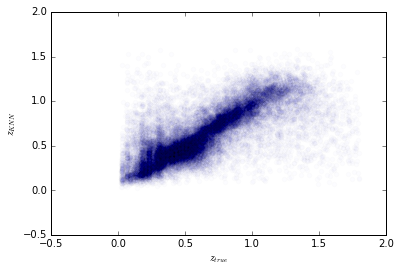

In [57]:
plt.scatter(y_test[:,0],y_test_predict['K-nn'][:,0],alpha=0.01)
plt.xlabel(r'$z_{true}$')
plt.ylabel(r'$z_{KNN}$')

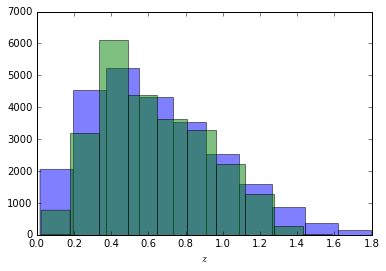

In [56]:
import seaborn as sns
plt.hist(y_test[:,0],alpha=0.5)
plt.hist(y_test_predict['K-nn'][:,0],alpha=0.5)
plt.xlabel(r'$z$')

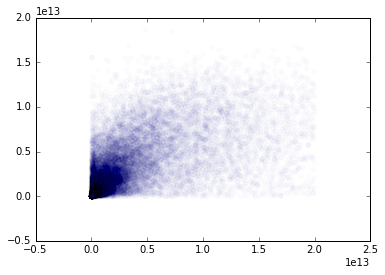

In [58]:
plt.scatter(y_test[:,1],y_test_predict['K-nn'][:,1],alpha=0.01)

(array([  1.34330000e+04,   4.40300000e+03,   2.65700000e+03,
          1.85100000e+03,   1.29800000e+03,   8.38000000e+02,
          4.70000000e+02,   1.80000000e+02,   4.30000000e+01,
          3.00000000e+00]),
 array([  2.53297272e+08,   1.86968066e+12,   3.73910801e+12,
          5.60853537e+12,   7.47796273e+12,   9.34739009e+12,
          1.12168174e+13,   1.30862448e+13,   1.49556722e+13,
          1.68250995e+13,   1.86945269e+13]),
 <a list of 10 Patch objects>)

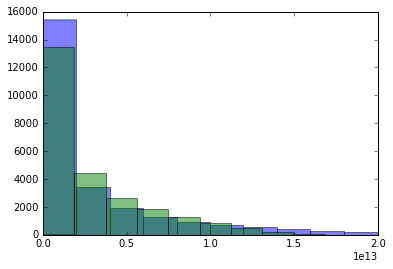

In [53]:
plt.hist(y_test[:,1],alpha=0.5)
plt.hist(y_test_predict['K-nn'][:,1],alpha=0.5)

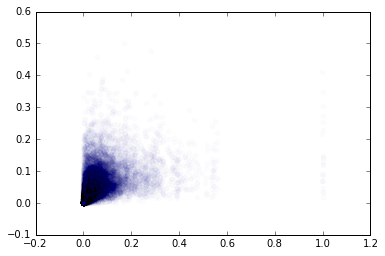

In [59]:
plt.scatter(y_test[:,2],y_test_predict['K-nn'][:,2],alpha=0.01)

(array([  1.68440000e+04,   5.47500000e+03,   1.92700000e+03,
          6.02000000e+02,   2.17000000e+02,   5.70000000e+01,
          3.80000000e+01,   1.00000000e+01,   3.00000000e+00,
          3.00000000e+00]),
 array([  3.57919193e-11,   5.02952257e-02,   1.00590451e-01,
          1.50885677e-01,   2.01180903e-01,   2.51476128e-01,
          3.01771354e-01,   3.52066580e-01,   4.02361805e-01,
          4.52657031e-01,   5.02952257e-01]),
 <a list of 10 Patch objects>)

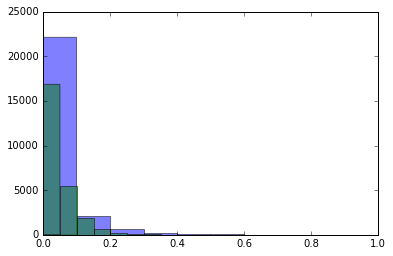

In [54]:
plt.hist(y_test[:,2],alpha=0.5)
plt.hist(y_test_predict['K-nn'][:,2],alpha=0.5)

In [44]:
def plot_corner_mcmc(array):

   
   #prior_min, prior_max = PriorRange('first_try' , Mr)
   prior_range = np.zeros((2,2))
   prior_range[:,0] = np.min(array[:,:2] , axis =0)
   prior_range[:,1] = np.max(array[:,:2] , axis =0)

   fig = corner.corner(
           array[:,:2],
           labels=[
               r'$z$',
               r'$M_{\star}$'
               ],
           label_kwargs={'fontsize': 25},
           range=prior_range,
           quantiles=[0.16,0.5,0.84],
           show_titles=True,
           title_args={"fontsize": 12},
           plot_datapoints=False,
           fill_contours=True,
           levels=[0.68, 0.95],
           color='#ee6a50',
           bins=15)
   fig_name = ''.join(['posterior.pdf'])
   fig.savefig(fig_name, bbox_inches='tight', dpi=150) 
   plt.close()
   return None

ValueError: Contour levels must be increasing

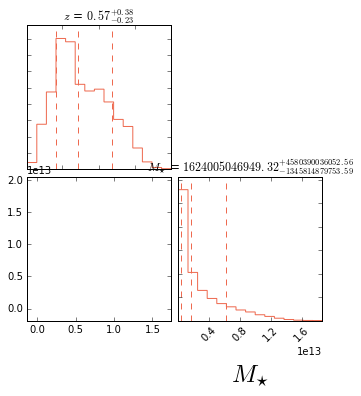

In [45]:
plot_corner_mcmc(y_test_predict['K-nn'])
    

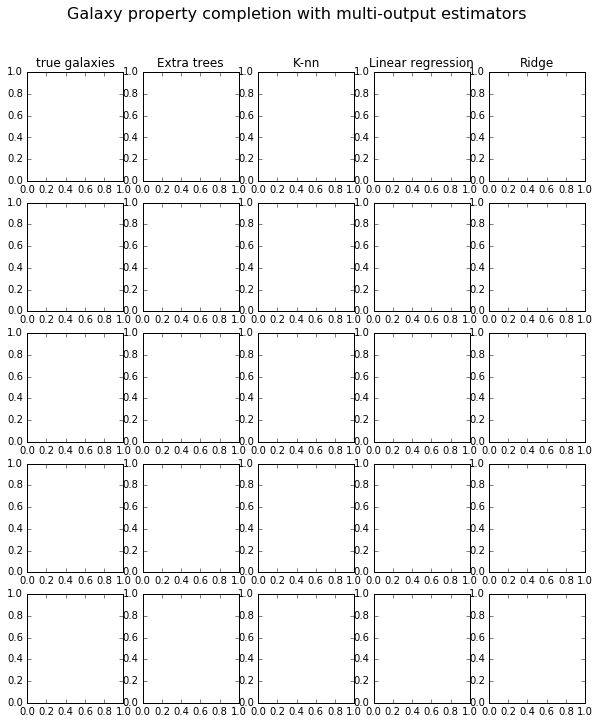

(array([  2.52453728e+01,   2.48981628e+01,   2.39710121e+01,
         2.38573513e+01,   2.29399757e+01,   8.71188998e-01,
         2.51728559e+12,   5.96642531e-02]), array([  2.52453728e+01,   2.48981628e+01,   2.39710121e+01,
         2.38573513e+01,   2.29399757e+01,   8.62679499e-01,
         4.69164982e+12,   5.09329128e-02]))


In [12]:
# Plot the completed faces
#image_shape = (5,3)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.))#n_faces))
plt.suptitle("Galaxy property completion with multi-output estimators", size=16)

#for i in range(n_gals):#(n_faces):
#    true_gal = np.hstack((X_test[i], y_test[i]))
plt.scatter(X_test[],y_test[i],color)

#     if i:
#         sub = plt.subplot(n_gals, n_cols, i * n_cols + 1)
#     else:
#         sub = plt.subplot(n_gals, n_cols, i * n_cols + 1,
#                           title="true galaxies")

#     sub.axis("off")
#     sub.imshow(true_gal,#.reshape(image_shape),
#                cmap=plt.cm.gray,
#                interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_gal = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_gals, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_gals, n_cols, i * n_cols + 2 + j,
                              title=est)

#         sub.axis("off")
#         sub.imshow(completed_gal,#.reshape(image_shape),
#                    cmap=plt.cm.gray,
#                    interpolation="nearest")

plt.show()

print(true_gal,completed_gal)